<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/60_40_Equities_and_Gold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from my_library import *

Risk Asset:  JNK
Alternative: BND


[*********************100%***********************]  2 of 2 completed
/tmp/ipython-input-1455713053.py:2: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  data.index=pd.DatetimeIndex(data.index).to_period('B')


Price           Close                  High                   Low             \
Ticker            BND        JNK        BND        JNK        BND        JNK   
Date                                                                           
2007-12-05  44.035706  40.088108  44.121308  40.088108  43.995752  40.088108   
2007-12-06  43.807415  39.987671  43.984333  39.987671  43.795998  39.954196   
2007-12-07  43.664764  40.012753  43.807441  40.012753  43.562037  40.004384   
2007-12-10  43.584854  40.205299  43.704702  40.205299  43.504956  40.104870   
2007-12-11  43.875866  40.171795  43.915815  40.364285  43.584809  40.171795   
...               ...        ...        ...        ...        ...        ...   
2026-02-09  74.250000  97.540001  74.269997  97.570000  74.139999  97.370003   
2026-02-10  74.470001  97.489998  74.519997  97.680000  74.430000  97.389999   
2026-02-11  74.320000  97.480003  74.480003  97.620003  74.290001  97.330002   
2026-02-12  74.660004  97.370003  74.680000  97.620003  74.430000  97.339996   
2026-02-13  74.879997  97.480003  74.900002  97.580002  74.809998  97.400002   

Price            Open               Return             Volume             \
Ticker            BND        JNK       BND       JNK      BND        JNK   
Date                                                                       
2007-12-05  44.029997  40.088108 -0.219818  0.020844    74500     2000.0   
2007-12-06  43.881605  39.954196 -0.518421 -0.250541    75500     1033.0   
2007-12-07  43.659056  40.004384 -0.325631  0.062723   135500     4267.0   
2007-12-10  43.687581  40.104870 -0.183009  0.481214    84600     2567.0   
2007-12-11  43.738898  40.364285  0.667690 -0.083334    97200     2133.0   
...               ...        ...       ...       ...      ...        ...   
2026-02-09  74.169998  97.379997  0.026939  0.143737  9429800  4766600.0   
2026-02-10  74.449997  97.599998  0.296298 -0.051264  8288400  3191500.0   
2026-02-11  74.309998  97.589996 -0.201425 -0.010252  7968800  3284500.0   
2026-02-12  74.459999  97.580002  0.457487 -0.112844  9884300  5057000.0   
2026-02-13  74.839996  97.440002  0.294661  0.112972  8306800  5124200.0   

Price      Weight         Return  Cumulative                         
Ticker        BND  JNK Portfolio         JNK        BND   Portfolio  
Date                                                                 
2007-12-05    0.4  0.6 -0.075421    0.020844  -0.219818   -0.075421  
2007-12-06    0.4  0.6 -0.357693   -0.229749  -0.737100   -0.432844  
2007-12-07    0.4  0.6 -0.092618   -0.167170  -1.060331   -0.525062  
2007-12-10    0.4  0.6  0.215525    0.313239  -1.241399   -0.310669  
2007-12-11    0.4  0.6  0.217076    0.229645  -0.581997   -0.094267  
...           ...  ...       ...         ...        ...         ...  
2026-02-09    0.4  0.6  0.097017  143.364770  68.242530  116.255039  
2026-02-10    0.4  0.6  0.087761  143.240011  68.741029  116.444826  
2026-02-11    0.4  0.6 -0.086721  143.215075  68.401142  116.257122  
2026-02-12    0.4  0.6  0.115288  142.940620  69.171555  116.506441  
2026-02-13    0.4  0.6  0.185647  143.215075  69.670036  116.908379  

[4577 rows x 18 columns]

18:07:01 Mean-Variance Optimal Fully Invested Portfolio is -21:121.


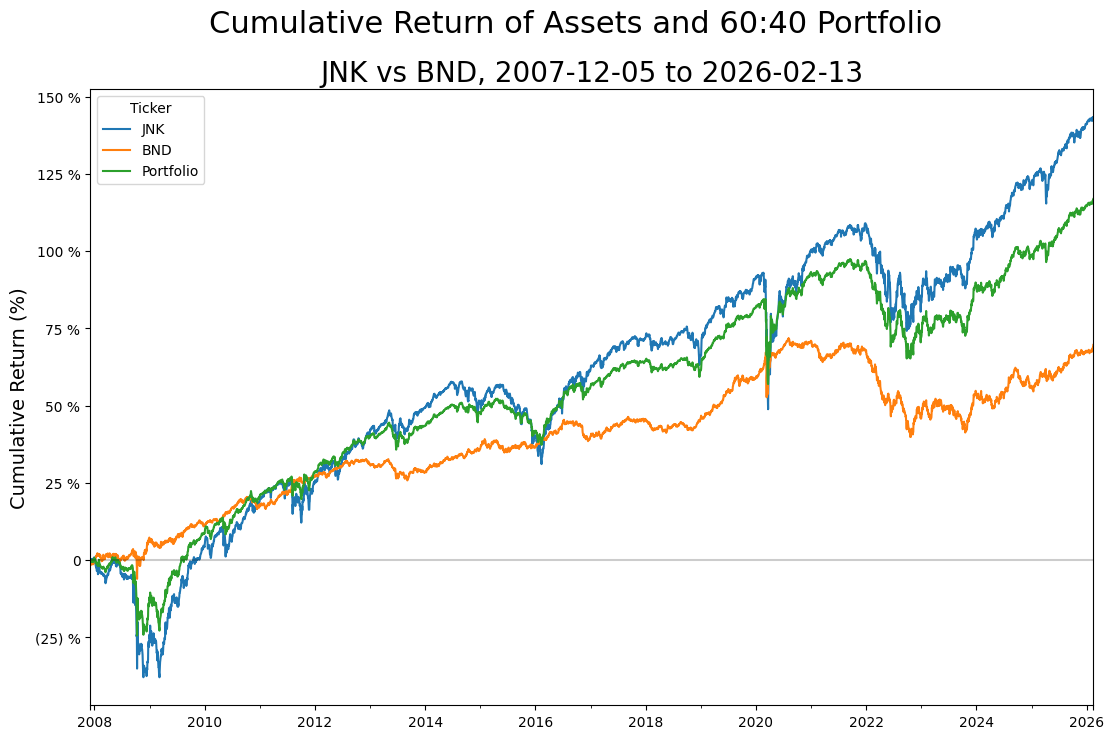

In [8]:
data=download(tickers:=[(market:=input("Risk Asset:  ")),(alternative:=input("Alternative: "))],"1990-01-01",today("%Y-%m-%d"),auto_adjust=True)
data.index=pd.DatetimeIndex(data.index).to_period('B')
#data=data.resample('M').last()

for ticker in tickers:
    data[('Return',ticker)]=data[('Close',ticker)].pct_change()*hundred
    data[('Weight',ticker)]=0.6 if ticker==market else 0.4

data.dropna(inplace=True)
data.sort_index(axis=1,inplace=True)
data[('Return','Portfolio')]=data.apply(lambda x:np.sum(x[('Weight',)]*x[('Return',)]),axis=1)

for ticker in tickers+['Portfolio']:
    data[('Cumulative',ticker)]=(data[('Return',ticker)]/hundred+one).cumprod()*hundred-hundred

figure,plot=pl.subplots(figsize=(8*GoldenRatio,8))
data['Cumulative'].plot(ax=plot)
figure.suptitle(title:='Cumulative Return of Assets and 60:40 Portfolio',fontsize=22)
plot.set_title(subtitle:="%s, %s to %s" % (" vs ".join(tickers),data.index[0],data.index[-1]),fontsize=20)
plot.set_xlabel(None)
plot.set_ylabel('Cumulative Return (%)',fontsize=14)
plot.yaxis.set_major_formatter(PercentLabels(0))
plot.axhline(color='black',alpha=0.2)
figure.savefig(title+".png",dpi=300,bbox_inches='tight')

display(data)

s1,s12,s12,s2=data['Return'][tickers].cov().to_numpy().reshape(4)
w1=(s2**2-s12)/(s1**2+s2**2-two*s12)
w2=one-w1
nprint("Mean-Variance Optimal Fully Invested Portfolio is %.0f:%0.f." % (w1*hundred,w2*hundred))

In [9]:
from warnings import filterwarnings ; filterwarnings('ignore',category=pd.errors.PerformanceWarning)

report=pd.DataFrame({'Weight':np.arange(zero,one+(delta:=0.05),delta)}).set_index("Weight")

if data.index.dtype==pd.PeriodDtype('W'):
    annualize=52e0

elif data.index.dtype==pd.PeriodDtype('M'):
    annualize=12e0

elif data.index.dtype==pd.PeriodDtype('Q'):
    annualize=4e0

elif data.index.dtype==pd.PeriodDtype('Y'):
    annualize=1e0

else:
    annualize=252e0

for weight in (p:=tqdm(report.index)):
    report.loc[weight,market]=weight
    report.loc[weight,alternative]=one-weight

    for ticker in tickers:
        data[('Weight',ticker)]=report.loc[weight,ticker]

    if ('Return','Portfolio') in data.columns:
        data.drop(('Return','Portfolio'),axis=1,inplace=True)

    data[('Return','Portfolio')]=data.apply(lambda x:np.sum(x[('Weight',)]*x[('Return',)]),axis=1)

    report.loc[weight,'Sample']=(r:=data[('Return','Portfolio')]).count()
    report.loc[weight,'Mean']=(m:=r.mean())
    report.loc[weight,'Std.Dev.']=(s:=r.std())
    report.loc[weight,'Std.Err.']=r.sem()
    report.loc[weight,'Kurtosis']=r.kurt()+three
    p.set_description("%+.1f" % (m/s*annualize**half))

report['Sharpe']=report['Mean']/report['Std.Dev.']*annualize**half
report['Sharpe S.E.']=((annualize/report['Sample'])*(one+(report['Kurtosis']-one)/four*report['Sharpe']**two))**half
report['Annualized']=hundred*(one+report['Mean']/hundred)**annualize-hundred

display(report)

  0%|          | 0/21 [00:00<?, ?it/s]

,JNK,BND,Sample,Mean,Std.Dev.,Std.Err.,Kurtosis,Sharpe,Sharpe S.E.,Annualized
Weight,,,,,,,,,,
0.00,0.00,1.00,4577.0,0.012102,0.331494,0.004900,36.383433,0.579514,0.467570,3.096369
0.05,0.05,0.95,4577.0,0.012600,0.324642,0.004799,41.615259,0.616119,0.516985,3.225926
0.10,0.10,0.90,4577.0,0.013098,0.321822,0.004757,47.614600,0.646104,0.568247,3.355646
0.15,0.15,0.85,4577.0,0.013597,0.323140,0.004776,54.191805,0.667953,0.617834,3.485528
0.20,0.20,0.80,4577.0,0.014095,0.328547,0.004856,60.958288,0.681043,0.661699,3.615573
0.25,0.25,0.75,4577.0,0.014594,0.337846,0.004994,67.403621,0.685717,0.696300,3.745780
0.30,0.30,0.70,4577.0,0.015092,0.350728,0.005184,73.044050,0.683091,0.719565,3.876150
0.35,0.35,0.65,4577.0,0.015590,0.366816,0.005422,77.553001,0.674702,0.731254,4.006684
0.40,0.40,0.60,4577.0,0.016089,0.385708,0.005701,80.809918,0.662169,0.732620,4.137381


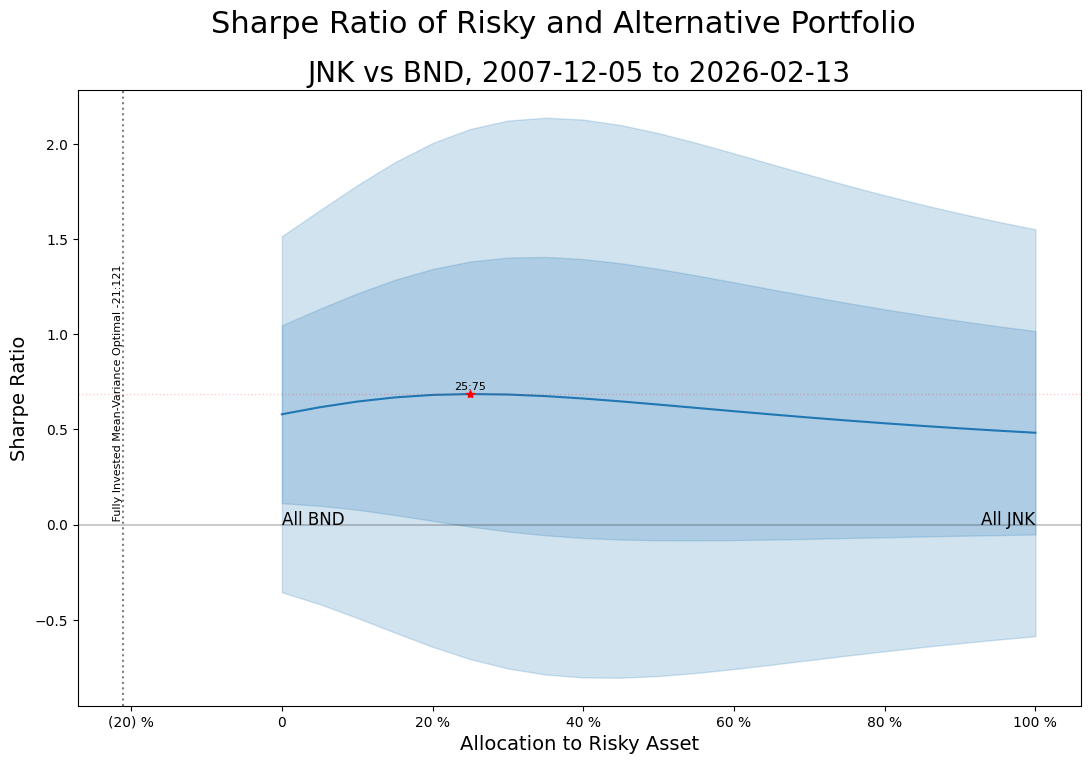

In [14]:
figure,plot=pl.subplots(figsize=(8*GoldenRatio,8))
plot.plot((x:=report.index.to_numpy())*hundred,y:=report.loc[x,'Sharpe'].to_numpy())
plot.fill_between(x*hundred,y+(ye:=report.loc[x,'Sharpe S.E.']),y-ye,color='C0',alpha=0.2)
plot.fill_between(x*hundred,y+two*ye,y-two*ye,color='C0',alpha=0.2)
figure.suptitle(title:='Sharpe Ratio of Risky and Alternative Portfolio',fontsize=22)
plot.set_title(subtitle,fontsize=20)
plot.set_xlabel('Allocation to Risky Asset',fontsize=14)
plot.set_ylabel('Sharpe Ratio',fontsize=14)
plot.xaxis.set_major_formatter(PercentLabels(0))
plot.text(zero,zero,"All "+alternative,fontsize=12,horizontalalignment='left')
plot.text(hundred,zero,"All "+market,fontsize=12,horizontalalignment='right')
plot.axhline(color='black',alpha=0.2)
plot.plot(x[(omega:=y.argmax())]*hundred,y[omega],'r*')
plot.text(x[omega]*hundred,y[omega]*1.02,'%.0f:%.0f' % (x[omega]*hundred,hundred-x[omega]*hundred),fontsize=8,ha='center',va='bottom')
plot.axhline(y[omega],color='red',linestyle=':',linewidth=1,alpha=0.2)
plot.axvline(w1*hundred,color='black',linestyle=':',alpha=0.5)
plot.text(w1*hundred,zero,' Fully Invested Mean-Variance Optimal %.0f:%0.f' % (w1*hundred,w2*hundred),rotation=90,ha='right',va='bottom',fontsize=8)
figure.savefig(title+".png",dpi=300,bbox_inches='tight')

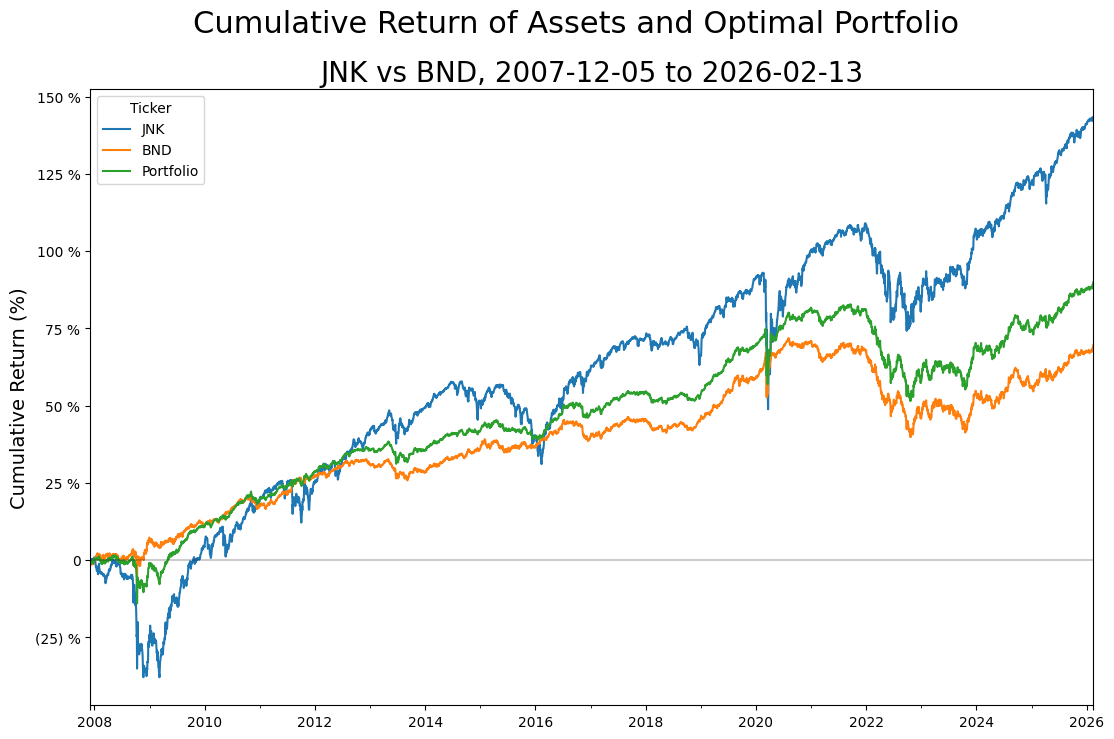

In [11]:
weight=x[y.argmax()]

for ticker in tickers:
    data[('Weight',ticker)]=report.loc[weight,ticker]

data.drop(('Return','Portfolio'),axis=1,inplace=True)
data[('Return','Portfolio')]=data.apply(lambda x:np.sum(x[('Weight',)]*x[('Return',)]),axis=1)
data[('Cumulative','Portfolio')]=(data[('Return','Portfolio')]/hundred+one).cumprod()*hundred-hundred

figure,plot=pl.subplots(figsize=(8*GoldenRatio,8))
data['Cumulative'].plot(ax=plot)
figure.suptitle(title:='Cumulative Return of Assets and Optimal Portfolio',fontsize=22)
plot.set_title(subtitle:="%s, %s to %s" % (" vs ".join(tickers),data.index[0],data.index[-1]),fontsize=20)
plot.set_xlabel(None)
plot.set_ylabel('Cumulative Return (%)',fontsize=14)
plot.yaxis.set_major_formatter(PercentLabels(0))
plot.axhline(color='black',alpha=0.2)
figure.savefig(title+".png",dpi=300,bbox_inches='tight')

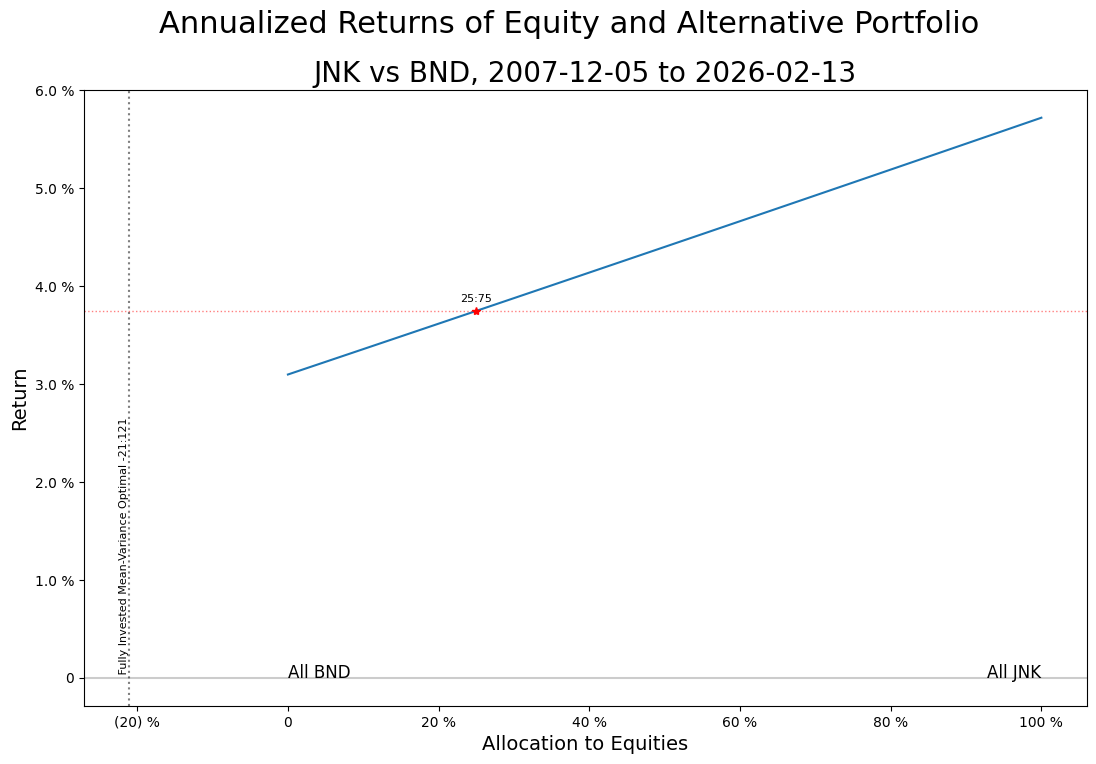

In [12]:
figure,plot=pl.subplots(figsize=(8*GoldenRatio,8))
plot.plot((x:=report.index.to_numpy())*hundred,y:=report.loc[x,'Annualized'].to_numpy())
figure.suptitle(title:='Annualized Returns of Equity and Alternative Portfolio',fontsize=22)
plot.set_title(subtitle,fontsize=20)
plot.set_xlabel('Allocation to Equities',fontsize=14)
plot.set_ylabel('Return',fontsize=14)
plot.xaxis.set_major_formatter(PercentLabels(0))
plot.yaxis.set_major_formatter(PercentLabels(1))
plot.text(zero,zero,"All "+alternative,fontsize=12,horizontalalignment='left')
plot.text(hundred,zero,"All "+market,fontsize=12,horizontalalignment='right')
plot.axhline(color='black',alpha=0.2)
plot.plot(x[omega]*hundred,y[omega],'r*')
plot.text(x[omega]*hundred,y[omega]*1.02,'%.0f:%.0f' % (x[omega]*hundred,hundred-x[omega]*hundred),fontsize=8,ha='center',va='bottom')
plot.axvline(w1*hundred,color='black',linestyle=':',alpha=0.5)
plot.text(w1*hundred,zero,' Fully Invested Mean-Variance Optimal %.0f:%0.f' % (w1*hundred,w2*hundred),rotation=90,ha='right',va='bottom',fontsize=8)
plot.axhline(y[omega],color='red',linestyle=':',linewidth=1,alpha=0.5)
figure.savefig(title+".png",dpi=300,bbox_inches='tight')